   ## Deep Learning->Image Classification(sad/happy) Using The CNN 
   ### Import the necessary dependencies; Tensorflow and openCV

In [2]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sn
import os
import imghdr
import numpy as np
%matplotlib inline



2024-05-31 00:25:32.706286: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-31 00:25:32.710168: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-31 00:25:32.767743: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 00:25:34.855758: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_11075/1876556776.py:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


### clean images 

In [3]:
#Dir containing the data and within it are subdir of happy and sad images and in each having respective images
data_dir='data'

#var to hold the valid extensions accepted
valid_extension_image=['jpeg','jpg','png','bmp']

#process of looping through the images
for data_subdir in os.listdir(data_dir):
    for image_file in os.listdir(os.path.join(data_dir,data_subdir)):
        image_file_path=os.path.join(data_dir,data_subdir,image_file)
        try:
            img=cv2.imread(image_file_path)
            tip=imghdr.what(image_file_path)
            if tip not in valid_extension_image:
                print('image extension {} not valid, deleting it'.format(image_file_path))
                os.remove(image_file_path)
                
        except Exception as e:
            print('error encountered while deleting the image\n{}'.format(e))
            

### Load data

In [4]:
#using tensorflow and keras to load the data and they do lebelling of the data on the fly i.e (sad=1 or happy=0)
# here it will auto-iterate through the subdir sad and happy and get all the files in
#labeling as based on the alphabetical order of the subdir
data=tf.keras.utils.image_dataset_from_directory(data_dir)


Found 599 files belonging to 2 classes.



### Scaling the data from size 255 to 1 i.e div by 255
### Plotting the images to visually see the labelling but labels are assigned based on the order of dirs
#### Class 0=happy, Class 1=sad

2024-05-31 00:25:44.282564: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 72000000 exceeds 10% of free system memory.


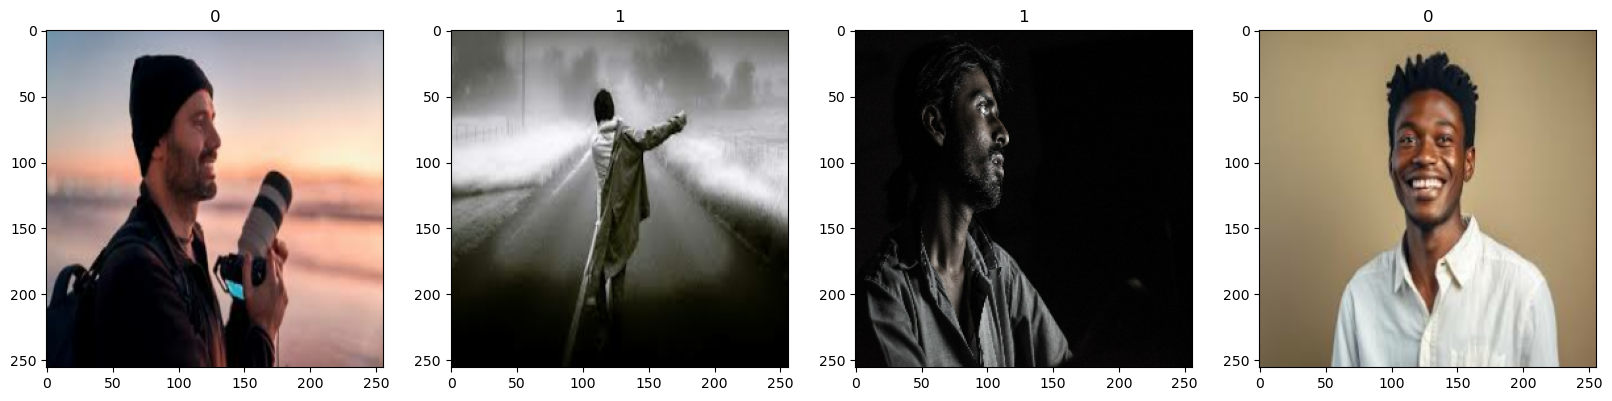

In [5]:
#scaling the data by dividing x with 255 since it is the one containing the data while y is for labels
data=data.map(lambda x, y : (x/255,y))
#applying iterator and next methods on the scaled results so to be able to loop and access them
batch_scaled_data=data.as_numpy_iterator().next()

#looping through the batch so as to plot and visualize the images and their respective labelings
figure,axes=plt.subplots(ncols=4,figsize=(20,20) )
for index, img in enumerate(batch_scaled_data[0][:4]):
    axes[index].imshow(img)
    axes[index].title.set_text(batch_scaled_data[1][index])
    

### Splitting the data into training_set,val_set, testing_set on the data of the scaled batch
#### in total there are 599 files and 32 image size per batch, leading to 19 batches 


In [6]:
# train data set is 70% evaluation dataset=20# and test data set=10%
train_data_set= int(len(data)*0.7)
#20% eval
eval_data_set=int(len(data)*0.2)+1
#10% testing
test_data_set=int(len(data)*0.1)+1
# all sum to 19 with train size 70%=13 batches, eval 20% +1=4 and test 10%=2 all totalling 19 batches

#using the take and skip methods from tensorflow that are operable on data in order to tell the CNN model
#how to allocate the data for training, evaluation and testsing

train_data=data.take(train_data_set)
eval_data=data.skip(train_data_set).take(eval_data_set)
test_data=data.skip(train_data_set+eval_data_set).take(test_data_set)

### Building the actual deep learning model using Convolutional Neural Networks (CNN) and sequential API
#### Import the required libraries from tensorflow and keras

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten
from tensorflow.keras import Input

In [8]:
#init the model
model=Sequential()

# Add an Input layer
model.add(Input(shape=(256, 256, 3)))

# Add a Conv2D layer
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=1, activation='relu'))
#add MaxPool2D
model.add(MaxPool2D())


# Add a Conv2D layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu'))
#add MaxPool2D
model.add(MaxPool2D())

# Add a Conv2D layer
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=1, activation='relu'))
#add MaxPool2D layer
model.add(MaxPool2D())

#add Flatten layer
model.add(Flatten())

#add Dense Layer
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

#compile the model
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
#display the model summary
model.summary()


<bound method Model.summary of <Sequential name=sequential, built=True>>

### Training the  Model

In [14]:
#creating a callback log directory helps in referencing and tracking of the train ability
log_dir='logs'

#dir_isntatiation
call_backs_dir=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
#begin process of training the AI model 50 epoch iterations and callback log tracking for reference
ai_model_trained=model.fit(train_data,epochs=10,callbacks=[call_backs_dir],validation_data=eval_data)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9799 - loss: 0.0731 - val_accuracy: 0.9844 - val_loss: 0.0719
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9965 - loss: 0.0502 - val_accuracy: 0.9531 - val_loss: 0.1181
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9917 - loss: 0.0488 - val_accuracy: 0.9922 - val_loss: 0.0337
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9981 - loss: 0.0254 - val_accuracy: 1.0000 - val_loss: 0.0222
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9749 - loss: 0.0632 - val_accuracy: 1.0000 - val_loss: 0.0436
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9931 - loss: 0.0432 - val_accuracy: 0.9844 - val_loss: 0.0622
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9863 - loss: 0.0483 - val_accuracy: 0.9922 - val_loss: 0.0539
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9959 - loss: 0.0264 - val_accuracy: 1.0000 - val_loss:

In [9]:
#access the model training history
ai_model_trained.history

{'accuracy': [0.526442289352417,
  0.5528846383094788,
  0.65625,
  0.7668269276618958,
  0.8028846383094788,
  0.8461538553237915,
  0.875,
  0.8966346383094788,
  0.9399038553237915,
  0.9591346383094788],
 'loss': [0.8772040009498596,
  0.6379948258399963,
  0.6358070969581604,
  0.5567169785499573,
  0.43466731905937195,
  0.36439448595046997,
  0.3195767402648926,
  0.2563767731189728,
  0.20113421976566315,
  0.13721826672554016]}

### Plotting the graph performance for accuracy against loss and 

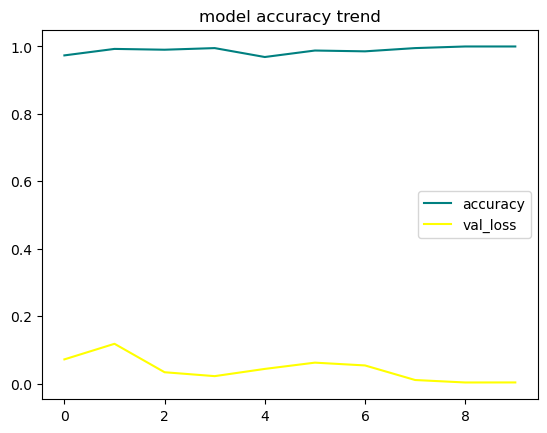

In [15]:

plt.plot(ai_model_trained.history['accuracy'], color='teal', label='accuracy')
plt.title('model accuracy trend')
plt.legend()
plt.show()

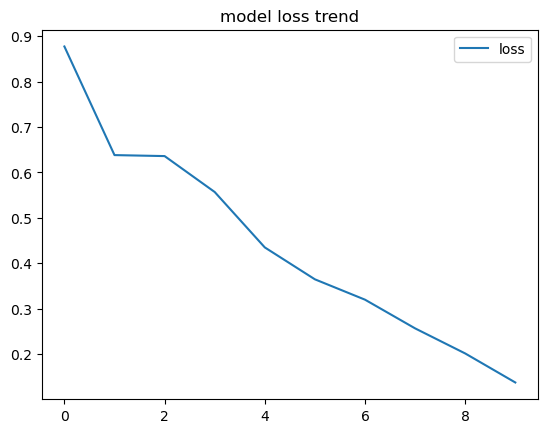

In [11]:
plt.plot(ai_model_trained.history['loss'], label='loss')
plt.legend()
plt.title('model loss trend')
plt.show()

### Model Evaluation
#### we use precision, recall and binary to evaluate the performance of the model using a test data

In [12]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

#init of the metrics
pre=Precision()
rec=Recall()
binary_Acc=BinaryAccuracy()

#will use the test data, this model hasnt seen it.
for batch in test_data.as_numpy_iterator():
    X, y =batch
    #will be used to compare with truth values
    yhat=model.predict(X)
    
    pre.update_state(y_true=y,y_pred=yhat)
    rec.update_state(y_true=y,y_pred=yhat)
    binary_Acc.update_state(y_true=y, y_pred=yhat)
    
    
    
    
#printing the values
print(f'\nPrecision=>{pre.result()}\n\nRecall=> {rec.result()}\n\nBinary_Acc=>{binary_Acc.result()}\n')
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


2024-05-29 18:29:20.660205: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Precision=>0.75

Recall=> 0.9599999785423279

Binary_Acc=>0.8363636136054993



### Making Predictions

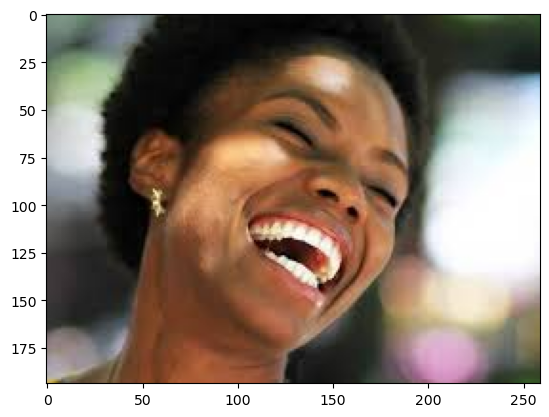

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.9997679]], dtype=float32)

In [22]:
#pass the image to be classified
image_to_predict=cv2.imread(os.path.join('classification/','hap4.jpg'))
#plotting the image to see it
plt.imshow(cv2.cvtColor(image_to_predict,cv2.COLOR_BGR2RGB))
plt.show()

#resize the image to 256
resized=tf.image.resize(image_to_predict,(256,256))
#convert it to have max dim of 1 and min 0 this is how we trained the data
yhat=model.predict(np.expand_dims(resized/255, 0))
#see the results
yhat